# Домашняя работа

In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
from metrics import Metrics
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
X, y = load_iris(return_X_y=True)
X = X[:, :2]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

In [3]:
class DimensionException(Exception):
    pass

In [4]:
class KNNClassifier:
    def __init__(self, count_of_nearest_neighbors=5, weights=None):
        """

        :param count_of_nearest_neighbors: Число ближайших точек обучающей выборки на основании которых принимается
        решение о принадлежности из к тому или иному классу
        :param weights: None - алгоритм не учитывает расстояние от наблюдения до обьекта обучающей выборки
        'num' - соответствует добавлению весов для соседей в зависимости от номера соседа,
        'dist' - соответствует добавление весов для соседей в зависимости от расстояния до соседа
        """
        self.count_of_nearest_neighbors = count_of_nearest_neighbors
        self.X = None
        self.y = None
        self.weights = weights

    def fit(self, X, y):
        """
        Метод для обучения модели
        :param X: матрица признаков
        :param y: вектор меток
        :return: None
        """
        self.X = X
        self.y = y

    def predict(self, observations):
        answers = []
        for x in observations:
            test_distances = []

            for i in range(len(self.X)):
                # расчет расстояния от классифицируемого объекта до
                # объекта обучающей выборки
                distance = Metrics.e_metrics(x, self.X[i])

                # Записываем в список значение расстояния и ответа на объекте обучающей выборки
                test_distances.append((distance, self.y[i]))

            # создаем словарь со всеми возможными классами
            classes = {class_item: 0 for class_item in set(self.y)}

            # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
            if not self.weights:
                for d in sorted(test_distances)[0:self.count_of_nearest_neighbors]:
                    classes[d[1]] += 1

                # Записываем в список ответов наиболее часто встречающийся класс
            if self.weights == 'num':
                for i, d in enumerate(sorted(test_distances)[0:self.count_of_nearest_neighbors], start=1):
                    classes[d[1]] += 1 / i

            if self.weights == 'dist':
                for d in sorted(test_distances)[0:self.count_of_nearest_neighbors]:
                    classes[d[1]] += 1 / (d[0] + 0.1)

            answers.append(sorted(classes, key=classes.get)[-1])

        return answers

    def create_figure(self):
        """
        Метод для построения разделяющей плоскости с нанесением обучающей выборки
        :return:
        """
        if self.X[:, :2].shape[1] > 2:
            raise DimensionException("I can't create figure of it, because dimension more then 2")

        cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#00AAFF'])
        cmap = ListedColormap(['red', 'green', 'blue'])
        h = .02

        # Расчет пределов графика
        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        # Получим предсказания для всех точек
        dots = self.predict(np.c_[xx.ravel(), yy.ravel()])

        # Построим график
        Z = np.array(dots).reshape(xx.shape)
        plt.figure(figsize=(7, 7))
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Добавим на график обучающую выборку
        plt.scatter(self.X[:, 0], self.X[:, 1], c=self.y, cmap=cmap)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title(f"Трехклассовая kNN классификация при k = {self.count_of_nearest_neighbors}")
        plt.show()

### К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от номера соседа.

accuracy=0.6666666666666666


<ipython-input-4-6ea939f1a150>:83: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


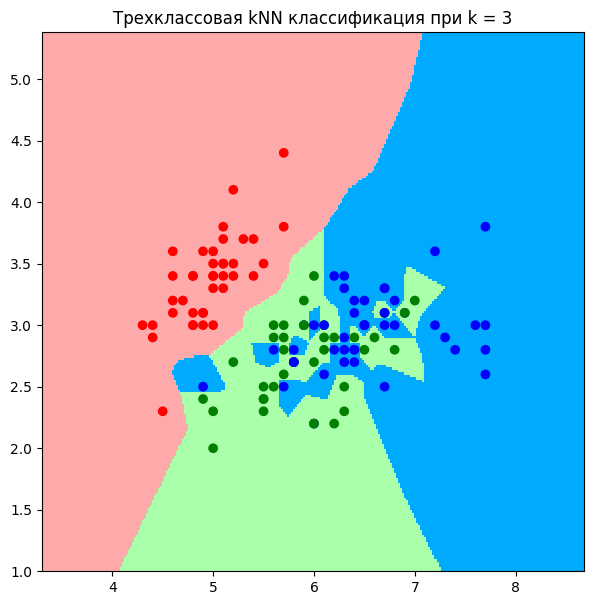

In [5]:
model = KNNClassifier(count_of_nearest_neighbors=3, weights='num')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'accuracy={Metrics.accuracy(y_test, y_pred)}')
model.create_figure()

accuracy=0.7333333333333333


<ipython-input-4-6ea939f1a150>:83: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


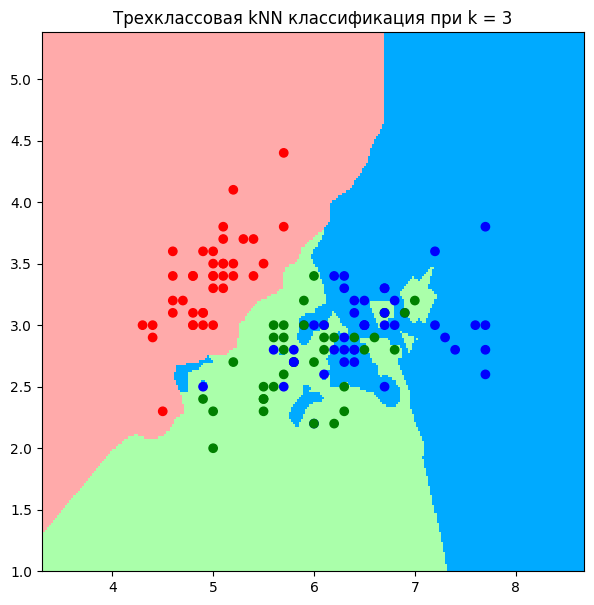

In [6]:
model = KNNClassifier(count_of_nearest_neighbors=3, weights='dist')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'accuracy={Metrics.accuracy(y_test, y_pred)}')
model.create_figure()

Из приведенных выше рисунков видно, что разделяющая плоскость у алгоритма с реализацией весов для соседей в зависимости от номера соседа (weight='num') лучше, чем у алгоритма с реализаций весов для соседей в зависимости от расстояния до соседа (weight='dist') (отсутствуют локальные артефакты, количество неправильно классифицированных точек на обучающей выборке меньше). Однако точность у второго алгоритма выше, чем у первого. Следовательно реализация алгоритма с wight='num' более склонна к переобучению. 

### Настроить оптимальное значение числа соседей для моделей из п.1 и п.2, сделать выводы. 

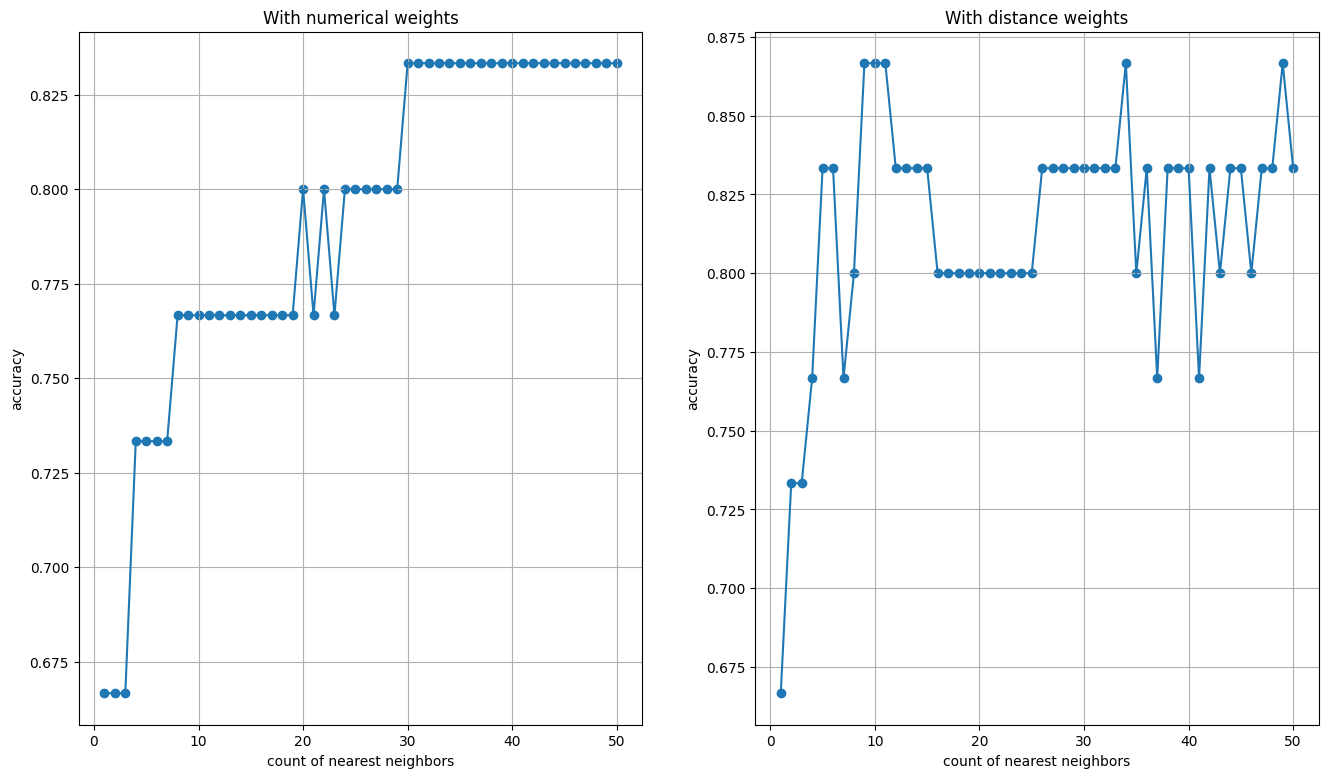

In [7]:
accuracies_num, accuracies_dist = [], []
k_range = list(np.linspace(start=1, stop=50, num=50, dtype=int))
k_names = [(accuracies_num, 'num'), (accuracies_dist, 'dist')]

for accuracies_list, k_name in k_names:
    for k in k_range:
        model = KNNClassifier(count_of_nearest_neighbors=k, weights=k_name)
        model.fit(X_train, y_train)
        accuracies_list.append(Metrics.accuracy(y_test, model.predict(X_test)))

# plt.figure(figsize=(16, 9))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))

ax1.set_title('With numerical weights')
ax1.plot(k_range, accuracies_num)
ax1.scatter(k_range, accuracies_num)
ax1.set_xlabel('count of nearest neighbors')
ax2.set_xlabel('count of nearest neighbors')
ax1.set_ylabel('accuracy')
ax2.set_ylabel('accuracy')
ax2.set_title('With distance weights')
ax2.plot(k_range, accuracies_dist)
ax2.scatter(k_range, accuracies_dist)
ax1.grid(True)
ax2.grid(True)
plt.show()

У алгоритма с реализаций весов для соседей в зависимости от расстояния до соседа, максимум точности тостигается при меньшем числе ближайших соседей, следовательно, алгоритм будет работать быстрее. Связь с числом ближайших соседей не линейная, имеет локальные максимумы (в отличие от первой реализации). Построим разделяющие плоскости 

<ipython-input-4-6ea939f1a150>:83: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


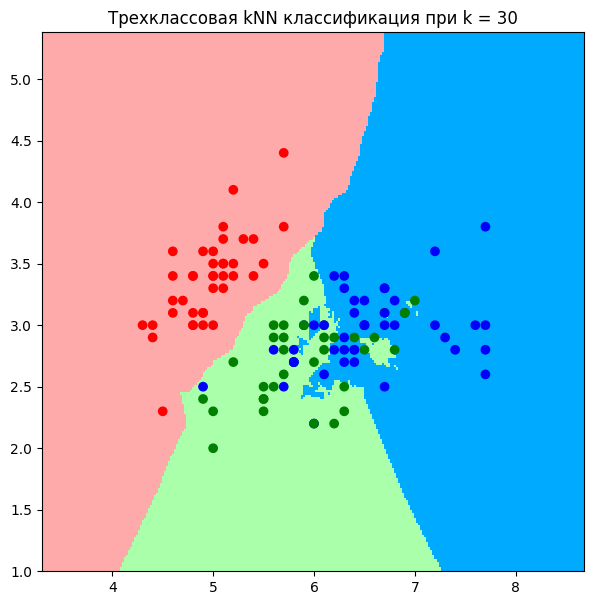

In [8]:
model = KNNClassifier(count_of_nearest_neighbors=30, weights='num')
model.fit(X_train, y_train)
model.create_figure()

Разделяющая плоскость выглядит неплохо, достаточно обобщенная. Посчитам точноть 

In [9]:
print(f'accuracy = {round(Metrics.accuracy(y_test, model.predict(X_test)), 2)}')

accuracy = 0.83


<ipython-input-4-6ea939f1a150>:83: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


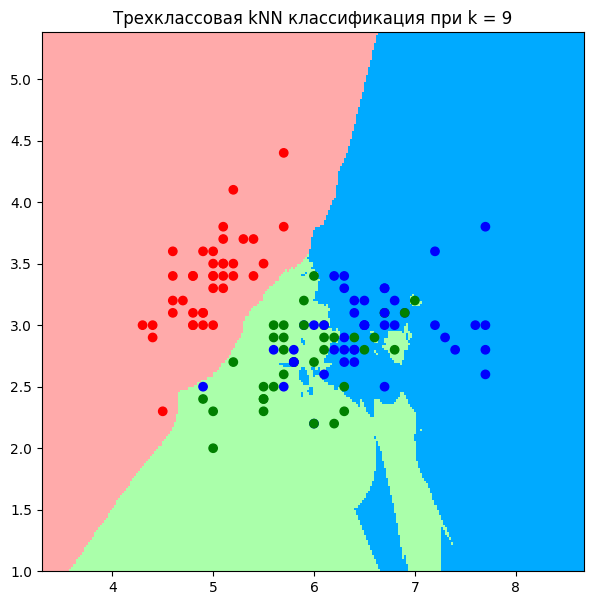

In [10]:
model = KNNClassifier(count_of_nearest_neighbors=9, weights='dist')
model.fit(X_train, y_train)
model.create_figure()

Модель имеет много артефактов, выберим другой пик из графика выше, например, count_of_nearest_neighbors=34

<ipython-input-4-6ea939f1a150>:83: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


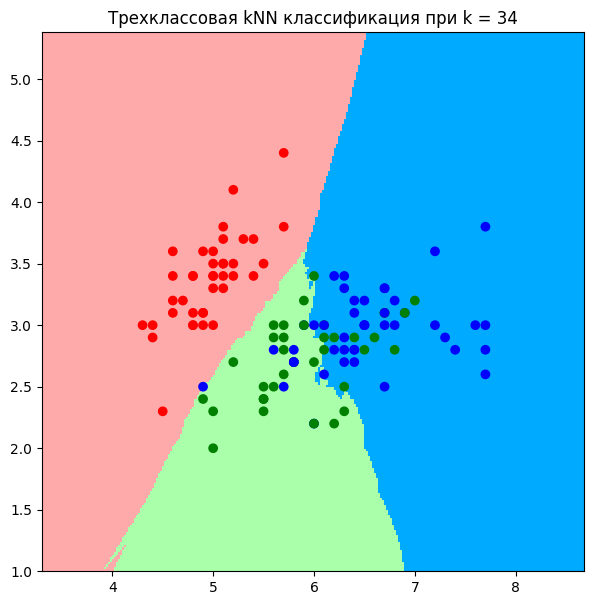

In [11]:
model = KNNClassifier(count_of_nearest_neighbors=34, weights='dist')
model.fit(X_train, y_train)
model.create_figure()

Разделяющая плоскость выглядит неплохо. Посчитаем метрику

In [12]:
print(f'accuracy = {round(Metrics.accuracy(y_test, model.predict(X_test)), 2)}')

accuracy = 0.87


Метрика немног выше чем у алгоритмя weight='num'

### 4 (опция). Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

In [13]:
from sklearn.datasets import make_blobs

In [14]:
class KMean:
    def __init__(self, cluster_count=3, max_iterations=5, min_distance=1e-4):
        """
        Конструктор класса

        :param cluster_count: Количество класстеров
        :param max_iterations: Максимальное количество итераций переноса центроидов класстера
        :param min_distance: Минимальная расстояние переноса центроидов класстеров, меньше которого алгоритм не воспринимает
        """
        self.cluster_count = cluster_count
        self.max_iterations = max_iterations
        self.min_distance = min_distance
        self.classes = None
        self.centroids = None

    def fit(self, data):
        """
        Метод для обучения модели

        :param data: Обучающая выборка
        :return: координаты центроидов, выборка разбитая по классам
        """
        self.classes = {i: [] for i in range(self.cluster_count)}

        # инициализируем центроиды как первые k элементов датасета
        centroids = [data[i] for i in range(self.cluster_count)]
        old_centroids = None
        for _ in range(self.max_iterations):
            # классифицируем объекты по центроидам
            for x in data:
                # определим расстояния от объекта до каждого центроида
                distances = [Metrics.e_metrics(x, centroid) for centroid in centroids]
                # отнесем объект к кластеру, до центроида которого наименьшее расстояние
                classification = distances.index(min(distances))
                self.classes[classification].append(x)

            # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
            old_centroids = centroids.copy()

            # пересчитаем центроиды как среднее по кластерам
            for classification in self.classes:
                centroids[classification] = np.average(self.classes[classification], axis=0)

            # сравним величину смещения центроидов с минимальной
            optimal = True
            for centroid in range(len(centroids)):
                if np.sum(
                        abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > self.min_distance:
                    optimal = False

            # если все смещения меньше минимального, останавливаем алгоритм
            if optimal:
                break
        self.centroids = old_centroids
        return old_centroids, self.classes

    def get_optimal_cluster_cout(self, data, k_start=1, k_stop=10):
        """
        Метод для построения графика зависимости количества кластеров от среднее квадратичного внутриклассового расстояния

        :param data: Обучающий датасет
        :param k_start: Начальное значение количества класстеров
        :param k_stop: Конечное значение количества класстеров
        """
        average_square_distances_list = []
        for k in range(k_start, k_stop + 1):
            self.cluster_count = k
            self.fit(data)

            average_square_distances_value = 0
            for classter, points in self.classes.items():
                average_square_distances_value += np.average(
                    np.array([Metrics.e_metrics(point, self.centroids[classter]) ** 2 for point in points])
                )

            average_square_distances_list.append(average_square_distances_value)

        plt.figure(figsize=(7, 7))
        plt.plot(range(1, len(average_square_distances_list) + 1), average_square_distances_list, c='orange')
        plt.scatter(range(1, len(average_square_distances_list) + 1), average_square_distances_list, c='green')
        plt.xlabel('cluster count')
        plt.ylabel('average square distances')
        for i in range(1, len(average_square_distances_list) + 1):
            plt.text(i - 0.5, average_square_distances_list[i - 1] + 0.5,
                     f'({i}, {round(average_square_distances_list[i - 1], 2)})')
        plt.show()

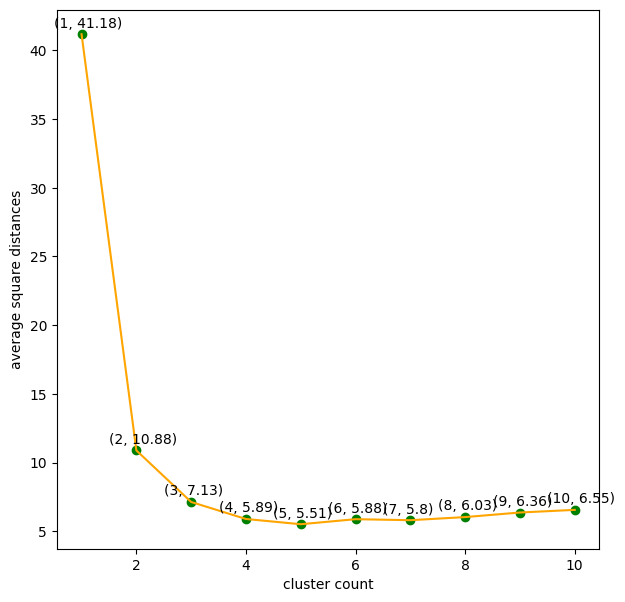

In [15]:
X, y = make_blobs(n_samples=100, random_state=1)

model = KMean()
centroid, classes = model.fit(X)
model.get_optimal_cluster_cout(X)